# Esercizio 9

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**Warm suggestion: by using the 1D representation** (but you can work with the representation you prefer or the one you are able to invent) ...

## Esercizio 9.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on! Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates

The traveling salesman problem
The traveling salesman problem (TSP) is a classic puzzle in optimization. Imagine a salesman who has to visit a set of $N$ cities, each located at positions $\vec{c}_i$. He must start from one city, travel through all the others one by one, and finally return to where he began. The challenge is to find the shortest possible route that allows him to complete the trip.
If we write down the cities in order, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, from city $1$ to city $N$, the actual shortest path will simply be some permutation of this sequence. In other words, the goal is to find the order of cities that makes the following cost function as small as possible:
$$ L^{(k)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^k $$
Here, $k$ just tells us what kind of distance measure (norm) we are using between cities. It’s a parameter that our program can take as input.
To search for this best path, we use something called a Genetic Algorithm (GA). It works by copying the way natural selection happens in nature. Instead of animals, we have a population of possible routes. At every step, some routes are chosen, combined, or slightly changed using techniques called crossover and mutation. Over many generations, this process helps us get closer and closer to the best solution. We even use different types of mutations, each with its own probability of being applied, and a selection method to decide which routes survive to the next round.


### The code
Here I will give a general overview of how the code works.
I created an input.txt file that contains all the information and parameters required for the program to run properly. The file looks like this:
```txt
TYPE  0
NORM_ORDER  2
POWER  4
N_CITIES 34
N_INDIVIDUALS  100
N_GENERATIONS  200
PROB_MUTATIONS  5 0.2 0.2 0.2 0.2 0.8

ENDINPUT
```
The cities are defined through the class City in the file cities.hpp. It is a very simple class: it has an arma::vec to store the coordinates and an int variable for the dimensionality of the problem. The cities are generated and initialized by a method of the main TSP class. To explain this class, I will follow the same order in which its methods are called in main.cpp, in order to make the structure more readable.
After declaring a member of TSP, the first function that is called is initialize(). This function reads the input file and stores all the parameters in the corresponding attributes of the class. Then, all necessary objects are set up. First of all, the cities are initialized. Depending on the parameter TYPE, they can either be placed on a circle (0) or inside a square (1). They are stored in an arma::field<City>.
Next, the population for the genetic algorithm is created by repeatedly shuffling a vector of consecutive integers from 0 to N_CITIES-1. These vectors are then stored in an arma::mat representing the whole population. The shuffle is designed so that the first city (position 0) remains fixed. In addition, I implemented two consistency checks: one to ensure that each individual contains all cities exactly once, and another to verify that the first position has not changed. These checks are called frequently throughout the code to ensure the correctness of the evolutionary process.
Once everything is in place, the population is ready to evolve. Each evolutionary step is handled inside the evolution() function. In each iteration:
the loss is computed for every individual, and the population is sorted accordingly. The best-performing individual will be placed first, and the worst one last.
This is achieved with the following procedure:

```cpp
    double distance(int city, int individualIndex) {
        int city1_index = _population(city, individualIndex);
        int city2_index = _population(boundary_condition(city + 1), individualIndex);
        
        arma::vec city1_pos = _cities(city1_index).getCoordinates();
        arma::vec city2_pos = _cities(city2_index).getCoordinates();
        
        double dx = city1_pos(0) - city2_pos(0);
        double dy = city1_pos(1) - city2_pos(1);
        
        if (_normOrder == 1) {
            return sqrt(dx*dx + dy*dy);  // Distanza euclidea
        } else if (_normOrder == 2)     
            return dx*dx + dy*dy; // Distanza quadratica
        else 
            return 1;
    }

    int boundary_condition(int i_city) {
        if (i_city < 0) {
            return _nCities - 1; // Torna all'ultima città se si esce a sinistra
        } else if (i_city >= _nCities) {
            return 0; // Torna alla prima città se si esce a destra
        }
        return i_city; // Ritorna l'indice della città se è valido
    }

    double loss_travel(int individualIndex) {
        double loss = 0.0;
        for (int cityIndex = 0; cityIndex < _nCities; cityIndex++) {
            loss += distance(cityIndex, individualIndex);
        }
        return loss;
    }

    void loss(){
        for (int travelIndex = 0; travelIndex < _nIndividuals; travelIndex++) {
            double individualLoss = loss_travel(travelIndex);
            if (individualLoss < 0) {
                cerr << "Error: Negative loss encountered for individual " << travelIndex << "." << endl;
                exit(EXIT_FAILURE);
            }
            _loss(travelIndex) = individualLoss;
        }   
        this->sortPopulationbyLoss();
    }

    void sortPopulationbyLoss() { 
        arma::uvec sortedIndices = arma::sort_index(_loss);
        _population = _population.cols(sortedIndices);
        _loss = _loss(sortedIndices);
    }
```
Notice that it is possible to switch between two distance norms: norm 1 or norm 2. The choice is controlled by the parameter NORM_ORDER in the input file. Sorting is done with an Armadillo function, based on the loss values.

Based on this ordering, the next operation is performed.

The parents are selected according to probabilities specified in the last entry of PROB_MUTATIONS. Using a fitness-proportionate selection scheme, individuals with lower loss are more likely to be chosen as parents. The parameter POWER allows the user to control how strongly the best individuals are favored.
The crossover, which is essential for the fast convergence of the algorithm, is implemented as follows:

```cpp
void crossOver(int travelIndex, int index1, int index2) {
        int cutPoint = 1 + _rnd.Rannyu(0, _nCities - 2); // Taglio tra posizione 1 e _nCities-2
        
        arma::Col<int> parent1 = arma::conv_to<arma::Col<int>>::from(_population.col(index1));
        arma::Col<int> parent2 = arma::conv_to<arma::Col<int>>::from(_population.col(index2));

        // 3. Crea i due offspring
        arma::Col<int> offspring1(_nCities);
        arma::Col<int> offspring2(_nCities);
        
        // 4. Conserva la prima parte di entrambi i genitori e crea liste delle città utilizzate
        std::vector<bool> used1(_nCities, false);
        std::vector<bool> used2(_nCities, false);
        for (int i = 0; i < cutPoint; i++) {
            offspring1(i) = parent1(i);
            offspring2(i) = parent2(i);
            used1[offspring1(i)] = true;
            used2[offspring2(i)] = true;
        }

        // 5. Completa offspring1 con le città mancanti nell'ordine di parent2
        int pos1 = cutPoint;
        for (int i = 0; i < _nCities && pos1 < _nCities; i++) {
            int city = parent2(i);
            if (!used1[city]) {
                offspring1(pos1) = city;
                used1[city] = true;
                pos1++;
            }
        }
        // 6. Inserisce un figlio nella popolazione
        _population.col(travelIndex) = arma::conv_to<arma::colvec>::from(offspring1);

        // 7. Verifica la validità dell'individuo generato
        this->checkPopulation();
        this->checkStartingPos();
    }
```

After crossover, the offspring is subjected to mutation, according to the probabilities specified in PROB_MUTATIONS.
The mutation operators are as follows:
- Swap mutation: two cities are chosen at random and their positions in the sequence are exchanged.
- Shift mutation: a block of consecutive cities is selected and shifted along the tour by a random offset.
- Block swap: two separate blocks of cities are picked and exchanged with each other.
- Inversion: the order of a chosen block of cities is reversed.

In all cases, the indices of cities or blocks are drawn randomly.

Finally, once mutations are applied, the population is sorted again based on the loss values.


## Results

I created the path plots and an animation showing how the path unravels as it approaches the optimum. Additionally, it is possible to observe the loss trend of the better half of the population. I did all of this for both city distributions.
 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

In [3]:
def read_output_file(filename):
    """Legge un file output e restituisce le coordinate dei punti e il loss."""
    points = []
    loss = None
    
    try:
        with open(filename, 'r') as f:
            lines = f.readlines()
            
        for line in lines:
            line = line.strip()
            if line.startswith("Loss:"):
                loss = float(line.split(":")[1].strip())
            elif line and not line.startswith("Partial results"):
                coords = line.split()
                if len(coords) == 2:
                    x, y = float(coords[0]), float(coords[1])
                    points.append((x, y))
    except:
        return [], None
    
    return points, loss

def create_tsp_animation(output_dir):
    """Crea un'animazione TSP semplice e professionale."""
    
    generations = list(range(0, 250, 10))
    all_data = []
    
    for gen in generations:
        filename = os.path.join(output_dir, f"output{gen}.txt")
        if os.path.exists(filename):
            points, loss = read_output_file(filename)
            if points and loss is not None:
                all_data.append((gen, points, loss))
    
    if not all_data:
        print("Nessun dato trovato!")
        return
    
    # Setup della figura
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Calcola i limiti globali per mantenere la scala fissa
    all_points = [point for _, points, _ in all_data for point in points]
    all_x = [p[0] for p in all_points]
    all_y = [p[1] for p in all_points]
    margin = (max(all_x) - min(all_x)) * 0.05
    
    ax.set_xlim(min(all_x) - margin, max(all_x) + margin)
    ax.set_ylim(min(all_y) - margin, max(all_y) + margin)
    
    # Elementi del plot che verranno aggiornati
    line, = ax.plot([], [], 'o-', color='#2E86AB', linewidth=2.5, markersize=8, alpha=0.8)
    start_point, = ax.plot([], [], 'o', color='#A23B72', markersize=12, zorder=5)
    
    # Styling
    ax.set_xlabel('X Coordinate', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y Coordinate', fontsize=12, fontweight='bold')
    ax.tick_params(labelsize=10)
    
    # Title che verrà aggiornato
    title = ax.set_title('', fontsize=16, fontweight='bold', pad=20)
    
    def animate(frame):
        """Funzione di animazione."""
        gen, points, loss = all_data[frame]
        
        if not points:
            return line, start_point, title
        
        # Prepara le coordinate (chiude il ciclo)
        x_coords = [p[0] for p in points] + [points[0][0]]
        y_coords = [p[1] for p in points] + [points[0][1]]
        
        # Aggiorna la linea e i punti
        line.set_data(x_coords, y_coords)
        
        # Aggiorna il punto di partenza
        start_point.set_data([points[0][0]], [points[0][1]])
        
        # Aggiorna il titolo
        title.set_text(f'TSP Evolution - Generation {gen} | Loss: {loss:.2f}')
        
        return line, start_point, title
    
    # Crea l'animazione
    anim = animation.FuncAnimation(
        fig, animate, frames=len(all_data), 
        interval=600, blit=True, repeat=True
    )
    
    # Aggiungi una legenda
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='#2E86AB', linewidth=2.5, 
                  markersize=8, label='Cities & Route'),
        plt.Line2D([0], [0], marker='o', color='#A23B72', linewidth=0, 
                  markersize=12, label='Start/End Point')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=11)
    
    plt.tight_layout()
    return anim




## CITTÀ DISPOSTE SULLA CIRCONFERENZA

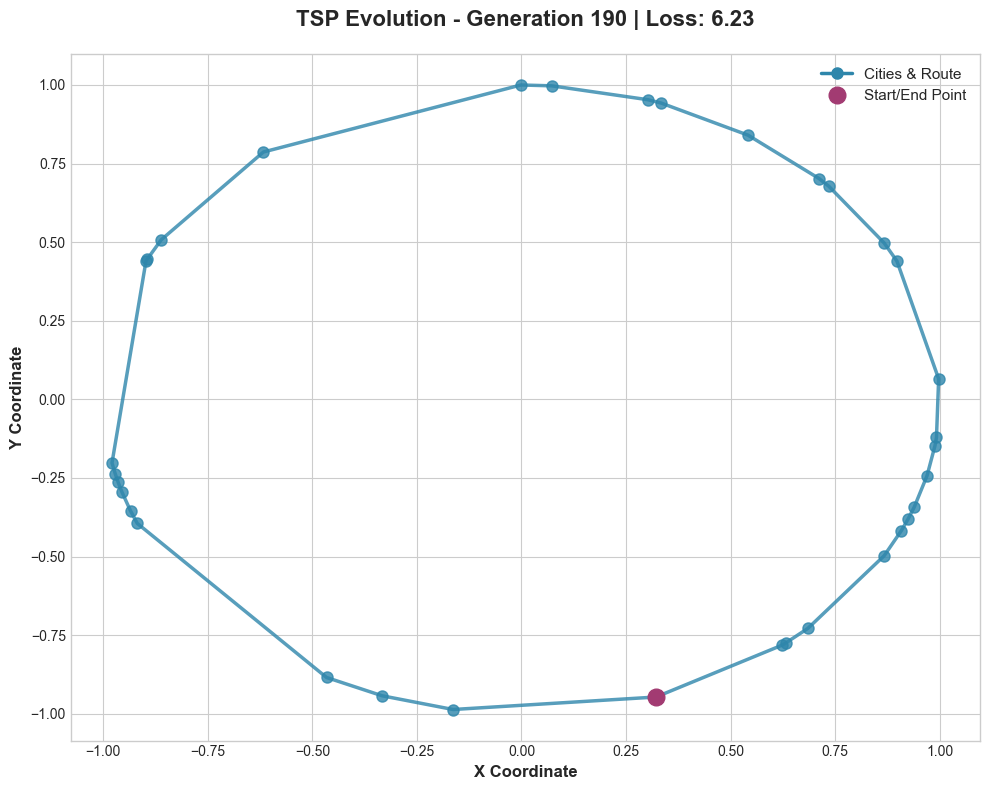

In [4]:
# Esegui l'animazione
anim = create_tsp_animation(output_dir="/Users/marta/Documents/LSN/09/09.1/OUTPUTCIRCLE/")

from IPython.display import HTML
HTML(anim.to_jshtml())

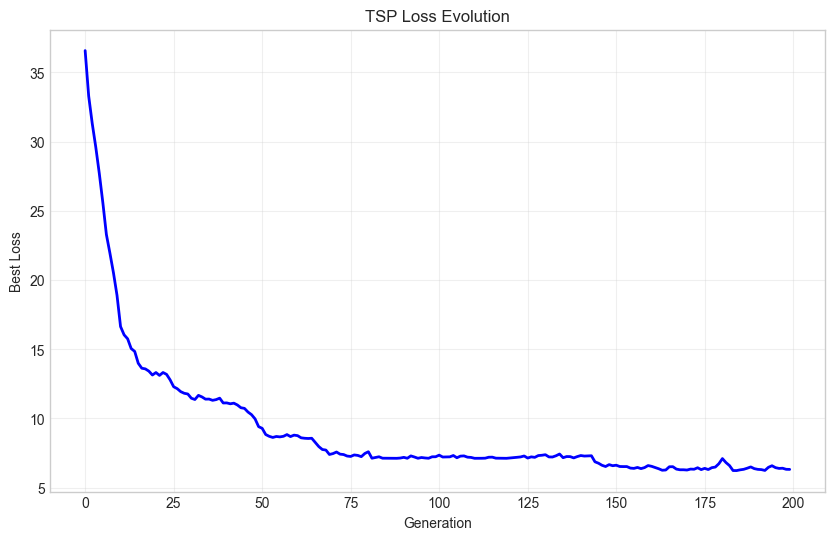

Initial loss: 36.582
Final loss: 6.317
Best loss: 6.233
Improvement: 82.7%


In [5]:
# Leggi i dati dal file loss.txt
data = np.loadtxt('/Users/marta/Documents/LSN/09/09.1/OUTPUTCIRCLE/average_loss.txt')

# Estrai generazioni e loss
generations = data[:, 0]
losses = data[:, 1]

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(generations, losses, 'b-', linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Best Loss')
plt.title('TSP Loss Evolution')
plt.grid(True, alpha=0.3)
plt.show()

# Stampa statistiche
print(f"Initial loss: {losses[0]:.3f}")
print(f"Final loss: {losses[-1]:.3f}")
print(f"Best loss: {min(losses):.3f}")
print(f"Improvement: {((losses[0] - losses[-1]) / losses[0] * 100):.1f}%")

## CITTÀ DISPOSTE IN UN QUADRATO

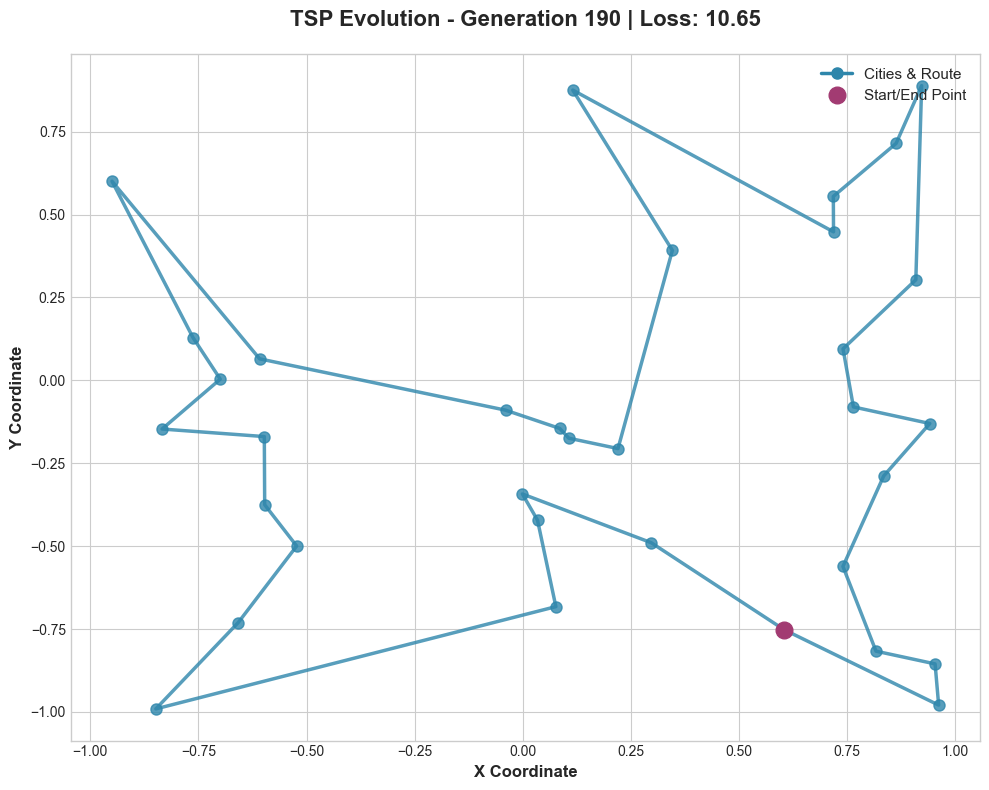

In [6]:
# Esegui l'animazione
anim = create_tsp_animation("/Users/marta/Documents/LSN/09/09.1/OUTPUTSQUARE/")
# Forza l'animazione a partire in Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())

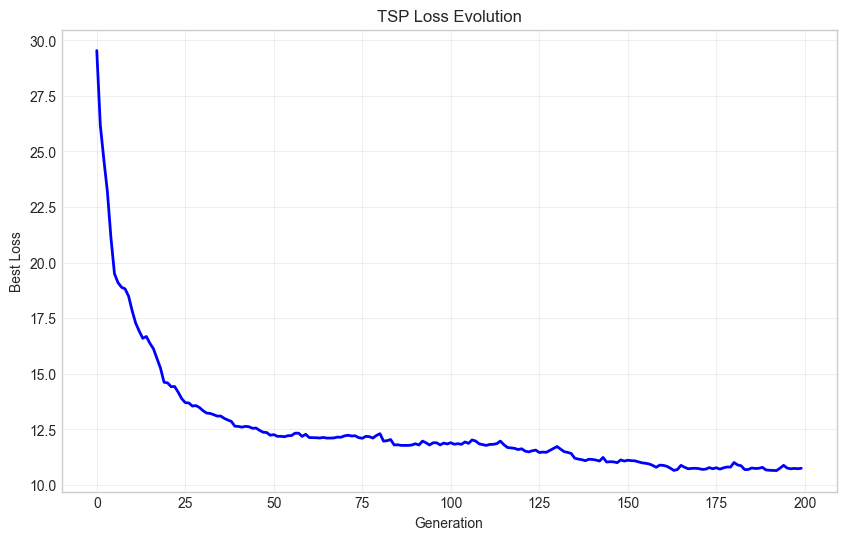

Initial loss: 29.537
Final loss: 10.750
Best loss: 10.646
Improvement: 63.6%


In [7]:
# Leggi i dati dal file loss.txt
data = np.loadtxt('/Users/marta/Documents/LSN/09/09.1/OUTPUTSQUARE/average_loss.txt')

# Estrai generazioni e loss
generations = data[:, 0]
losses = data[:, 1]

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(generations, losses, 'b-', linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Best Loss')
plt.title('TSP Loss Evolution')
plt.grid(True, alpha=0.3)
plt.show()

# Stampa statistiche
print(f"Initial loss: {losses[0]:.3f}")
print(f"Final loss: {losses[-1]:.3f}")
print(f"Best loss: {min(losses):.3f}")
print(f"Improvement: {((losses[0] - losses[-1]) / losses[0] * 100):.1f}%")